## ASTRON 16 Lab 1
# Using doppler effect to measure $v_\mathrm{rot}$

### Please enter your name in this cell

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units

# Part 1: Doppler Shift

If using Google colab, run the following cell and upload all 8 fits files

In [ ]:
from google.colab import files
uploaded = files.upload()

You will need the path to the directory that contains your fits files and the names of all 8 fits files.

In [6]:
# Type the path to your directory in quotes, ending in /, to signal it is a directory.
# If you uploaded your files to Google Colab using the above cell, you shouldn't need to
# change this.
path = './'

# Eneter the names of alll 8 fits files, individually in quotations, then separated by a comma 
# into the list called filenames.
filenames=['B1.fit', 'BL1.fit', 'br1.fit', 'T1.fit', 'TL1.fit', 'TR1.fit', 'L1.fit', 'R1.fit']

### Let's look at all our fits files.

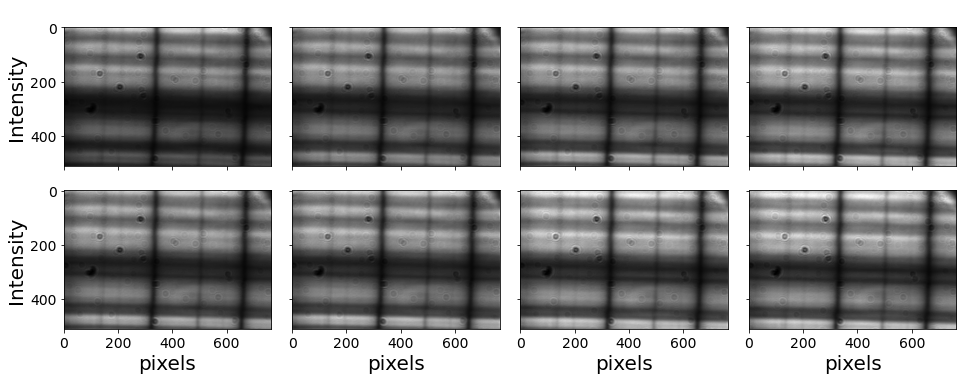

In [7]:
# This cell plots all of your fits images in a grid. 
#The name of each file will be printed on top of each image
fs = 20
fig, ax = plt.subplots(2,4, figsize = (16,6), sharey=True, sharex=True)
for i,file in enumerate(filenames):
    image = fits.getdata(path+file, ext=0)
    if i < 4:
        ax[0][i].imshow(image, cmap='gray')
        ax[0][i].set_title(file, c='w', fontsize=fs)
        ax[0][i].tick_params(labelsize=14)
    else:
        ax[1][i-4].imshow(image, cmap='gray')
        ax[1][i-4].set_title(file, c = 'w', fontsize=fs)
        ax[1][i-4].tick_params(labelsize=14)
        ax[1][i-4].set_xlabel('pixels', fontsize=fs)
        
ax[0][0].set_ylabel('Intensity', fontsize=fs)
ax[1][0].set_ylabel('Intensity', fontsize=fs)
plt.subplots_adjust(wspace=0.1, hspace=0.)

### Now lets select one file to look at in closer detail.
### We will then select a "slice" of the image in order to plot our spectra.

In [ ]:
# Enter the name of the file you wish to look at more closely
selected_file = 'br1.fit'

# Now let's make an object we can plot
selected_image = fits.getdata(path+selected_file, ext=0)

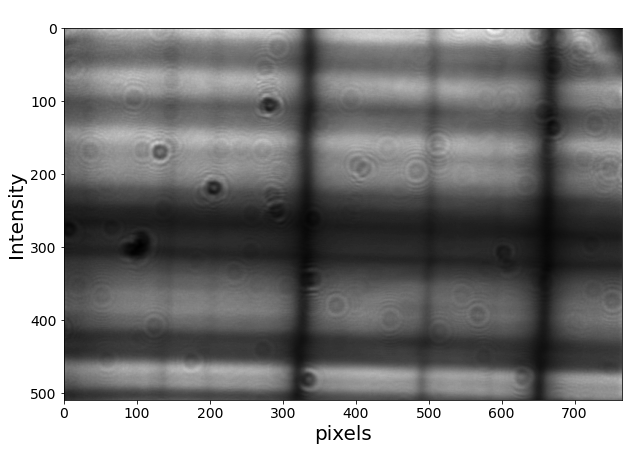

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(selected_image, cmap='gray')
plt.title(selected_file, c = 'w', fontsize=fs)
plt.tick_params(labelsize=14)
plt.xlabel('pixels', fontsize=fs)
plt.ylabel('Intensity', fontsize=fs);

### Let's select the "slice"
Look at the intensity range of your image. Between which two intensity values do you see the most clear, and unobstructed section of the image? These will be the boundaries of your "slice". 

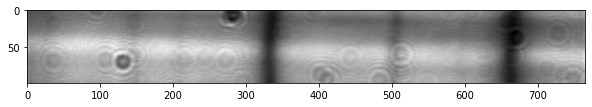

In [ ]:
# Type the boundaries of the "slice". 
# You can keep adjusting the bounds until you get a sloice you want to use.
# Remember: we want both Na D lines and the Telluric line!

#boundaries
low = 100
high = 200

#make the slice
image_slice = selected_image[low:high]

#plot
plt.figure(figsize=(10,12))
plt.imshow(image_slice, cmap='gray');

### Let's plot the pectra of all 8 images taking this slice.

In [ ]:
#This function norms the data
def norm(data):
    '''
    This function norms the slected data for plotting the spectra.
    
    parameters
    ---------
    data: nd-array, slice of fits file 
    
    returns:
    -------
    1d-array, normed intensity of spectra
    '''
    data_cut = data[low:high]
    I_mean = np.mean(data_cut, axis=0)
    I_median = np.median(I_mean)
    data_norm = I_mean/I_median
    return data_norm
    

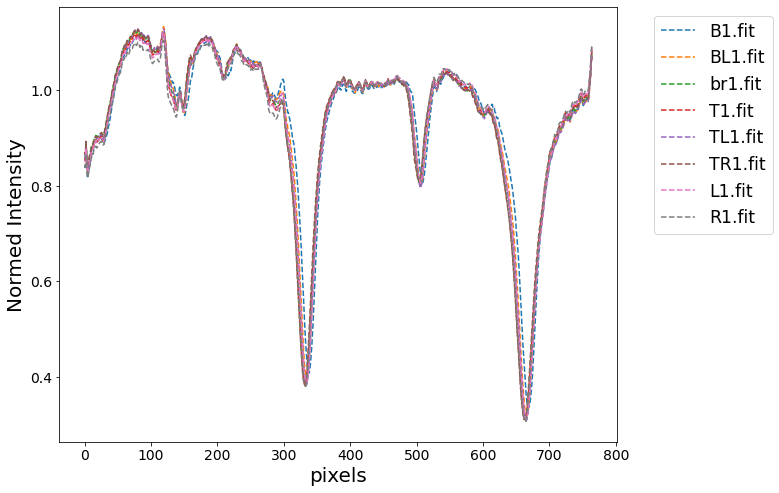

In [ ]:
#This cell plots all 8 normed spectra
fig = plt.figure(figsize = (10,8))
for i,file in enumerate(filenames):
    image      = fits.getdata(path+file, ext=0)
    norm_slice = norm(image)
    plt.plot(norm_slice, linestyle='dashed', label=file)
plt.tick_params(labelsize=14)
plt.xlabel('pixels', fontsize=fs)
plt.ylabel('Normed Intensity', fontsize=fs);
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-large');

### Select the two spectra for which you notice the greatest shift.

In [ ]:
spectra_choice_1 = 'B1.fit'
spectra_choice_2 = 'R1.fit'

In [ ]:
spectrum_1 = norm(fits.getdata(path+spectra_choice_1, ext=0))
spectrum_2 = norm(fits.getdata(path+spectra_choice_2, ext=0))

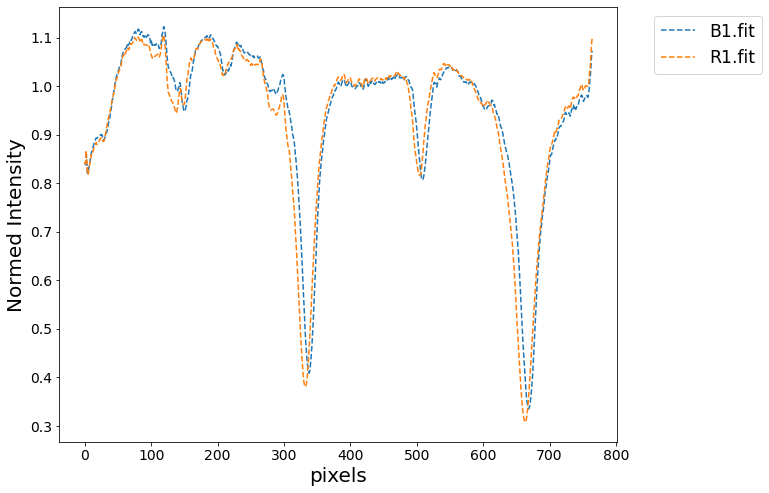

In [ ]:
#This cell plots all 8 normed spectra
fig = plt.figure(figsize = (10,8))
plt.plot(spectrum_1, label=spectra_choice_1, linestyle='dashed')
plt.plot(spectrum_2, label=spectra_choice_2, linestyle='dashed')
plt.tick_params(labelsize=14)
plt.xlabel('pixels', fontsize=fs)
plt.ylabel('Normed Intensity', fontsize=fs);
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-large');

How does it look? Can you see a clear Doppler effect?

# Part 2: Determining $v_\mathrm{rot}$

### First we need to fit the curves of the absorption lines
We do this by selecting a range in pixels that "zooms in" to where our absorbtion lines are at the minimum.

In [ ]:
#We make an array of the pixels to maintain the same pixel values when we zoom in to the cuves.
pixels = np.arange(0,spectrum_1.shape[0])

In [ ]:
#def zoom_in(data_1, data_2, lowpix_1, highpix_1, lowpix_2, highpix_2):
def zoom_in(data, lowpix, highpix):
    '''
    This function makes a cut, "zoom-in", to the absroption line minimums.
    
    parameters
    ----------
    data_1: 1d-array, normed spectrum
    data_2: 1d-array, normed spectrum shifted from the first
    
    (lowpix and highpix are the pixel boundaries bwteen where our curves lie)
    
    lowpix_1: int, low boundary for first spectrum
    highpix_1: int, high boundary for first spectrum
    
    lowpix_2: int, low boundary for second spectrum
    highpix_2: int, high boundary for second spectrum
    
    returns
    ----------
    1d-array, pixels between where minimums lie
    1d-array, region of spectra where minimums lie
    '''
    return pixels[lowpix:highpix],data[lowpix:highpix]
    
    

In [ ]:
### Define your zoomed-in ranges for the left line
NaD_1_b1 = zoom_in(spectrum_1,328,347)
NaD_1_r1 = zoom_in(spectrum_2, 325,340)

In [ ]:
### Define your zoomed-in ranges for the right line
NaD_2_b1 = zoom_in(spectrum_1,663,675)
NaD_2_r1 = zoom_in(spectrum_2, 656,670)

In [ ]:
### Define your zoomed-in ranges for the Telluric
H2O_b1 = zoom_in(spectrum_1,120,165)
H2O_r1 = zoom_in(spectrum_2,120,165)

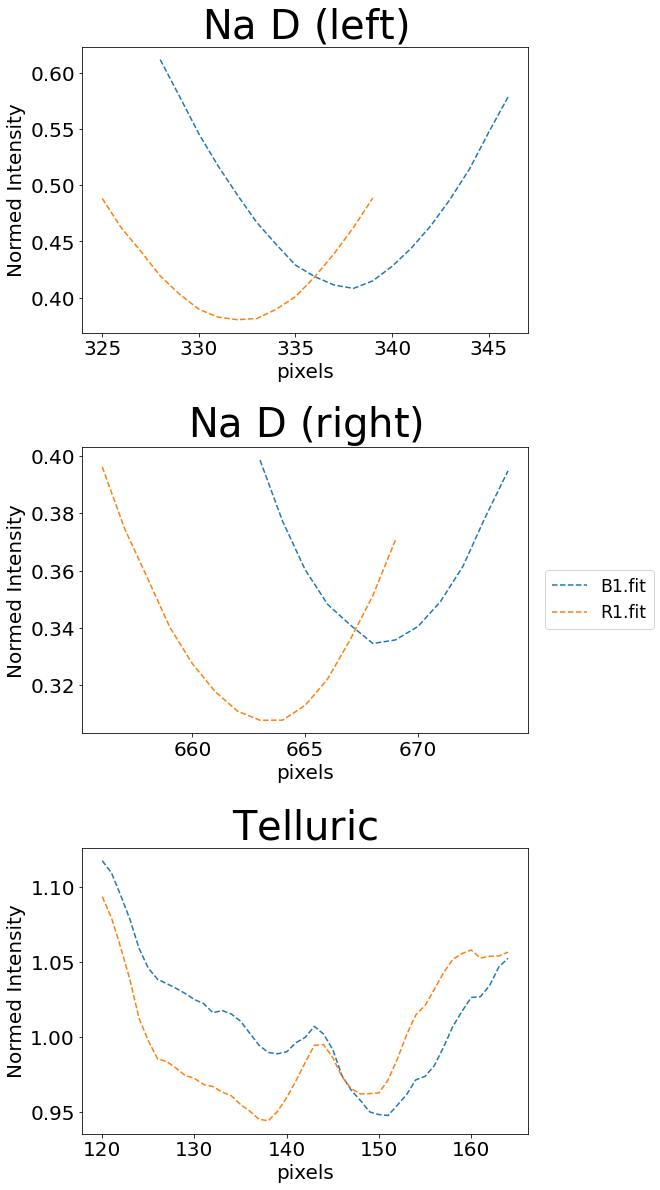

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (8,20))
ax[0].plot(NaD_1_b1[0],NaD_1_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[0].plot(NaD_1_r1[0], NaD_1_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[0].set_title('$\mathrm{Na\ D\ (left)}$',fontsize=40)

ax[1].plot(NaD_2_b1[0],NaD_2_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[1].plot(NaD_2_r1[0], NaD_2_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[1].set_title('$\mathrm{Na\ D\ (right)}$',fontsize=40)

ax[2].plot(H2O_b1[0], H2O_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[2].plot(H2O_r1[0], H2O_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[2].set_title('$\mathrm{Telluric}$',fontsize=40)
for i in range(3):
    ax[i].tick_params(labelsize=20)
    ax[i].set_xlabel('pixels', fontsize=fs)
    ax[i].set_ylabel('Normed Intensity', fontsize=fs);
plt.legend(bbox_to_anchor=(1.3, 2), fontsize='xx-large');
plt.subplots_adjust(hspace=0.4)

### These resmble polynomial functions. We now fit these curves in order to obtain the pixel value where the true minimum occurs. 

In [ ]:
# This the polynomial we will use to fit our data
def poly(x,a,b,c):
    '''
    This function reurns a parabola with given input.
    
    parameters
    ----------
    x: 1D-array, the independent variable, in our cse, pixel values
    a,b,c : floats, the coefficients of our parabolic function
    
    returns
    ---------
    1D-array, the normed intensity as a function of pixel values'''
    y = a*x**2 + b*x +c
    return y

#### Fit the curves

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
#we learned in our first jupyter notebook that it's useful to begin with some guess
guess = [0.5, 1.0, 400]

In [ ]:
# We only need the parameters, not the covariance, so we will take index[0] of curve_fit
NaD_1_b1_params = curve_fit(poly, NaD_1_b1[0], NaD_1_b1[1], p0=guess)[0]
NaD_1_r1_params = curve_fit(poly, NaD_1_r1[0], NaD_1_r1[1], p0=guess)[0]

In [ ]:
# We only need the parameters, not the covariance, so we will take index[0] of curve_fit
NaD_2_b1_params = curve_fit(poly, NaD_2_b1[0], NaD_2_b1[1], p0=guess)[0]
NaD_2_r1_params = curve_fit(poly, NaD_2_r1[0], NaD_2_r1[1], p0=guess)[0]

In [ ]:
# We only need the parameters, not the covariance, so we will take index[0] of curve_fit
H2O_b1_params = curve_fit(poly, H2O_b1[0], H2O_b1[1], p0=guess)[0]
H2O_r1_params = curve_fit(poly, H2O_r1[0], H2O_r1[1], p0=guess)[0]

#### We create a new set ov values based on our fit parameters. Remmeber, you may need to make minor adjustments to improve the fit of your curves.

In [ ]:
NaD_1_b1_fit = poly(NaD_1_b1[0],NaD_1_b1_params[0], NaD_1_b1_params[1],NaD_1_b1_params[2])
NaD_1_r1_fit = poly(NaD_1_r1[0],NaD_1_r1_params[0], NaD_1_r1_params[1],NaD_1_r1_params[2])

In [ ]:
NaD_2_b1_fit = poly(NaD_2_b1[0],NaD_2_b1_params[0], NaD_2_b1_params[1],NaD_2_b1_params[2])
NaD_2_r1_fit = poly(NaD_2_r1[0],NaD_2_r1_params[0], NaD_2_r1_params[1],NaD_2_r1_params[2])

In [ ]:
H2O_b1_fit = poly(H2O_b1[0],H2O_b1_params[0], H2O_b1_params[1],H2O_b1_params[2])
H2O_r1_fit = poly(H2O_r1[0],H2O_r1_params[0], H2O_r1_params[1],H2O_r1_params[2])

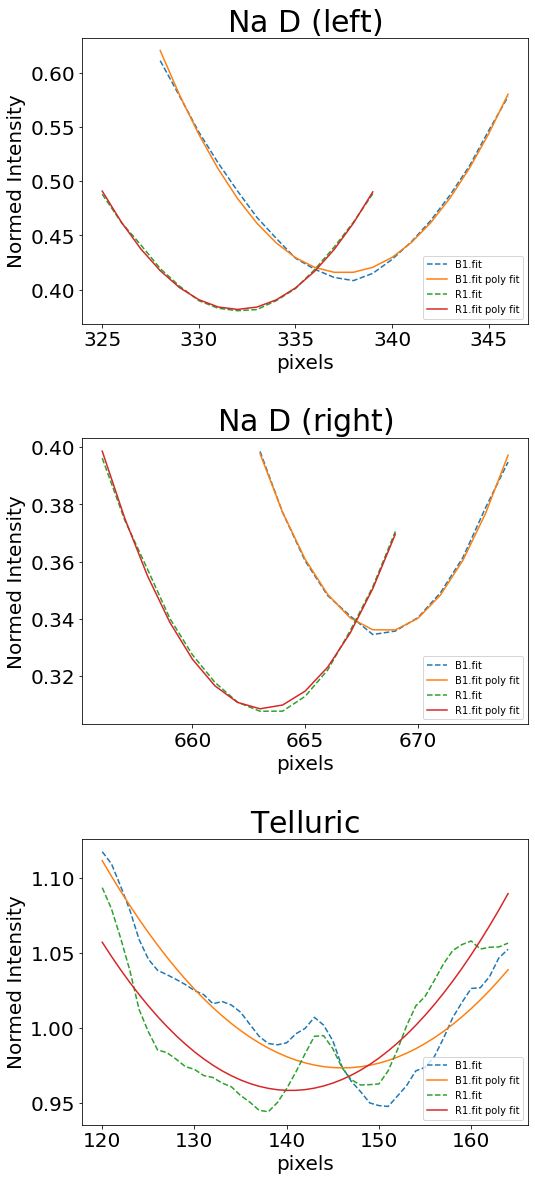

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (8,20))
ax[0].plot(NaD_1_b1[0],NaD_1_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[0].plot(NaD_1_b1[0],NaD_1_b1_fit, label = spectra_choice_1+' poly fit')

ax[0].plot(NaD_1_r1[0], NaD_1_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[0].plot(NaD_1_r1[0],NaD_1_r1_fit, label = spectra_choice_2+' poly fit')
ax[0].set_title('$\mathrm{Na\ D\ (left)}$',fontsize=30)

ax[1].plot(NaD_2_b1[0],NaD_2_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[1].plot(NaD_2_b1[0],NaD_2_b1_fit, label = spectra_choice_1+' poly fit')
ax[1].plot(NaD_2_r1[0], NaD_2_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[1].plot(NaD_2_r1[0],NaD_2_r1_fit, label = spectra_choice_2+' poly fit')
ax[1].set_title('$\mathrm{Na\ D\ (right)}$',fontsize=30)

ax[2].plot(H2O_b1[0],H2O_b1[1], label = spectra_choice_1, linestyle='dashed')
ax[2].plot(H2O_b1[0],H2O_b1_fit, label = spectra_choice_1+' poly fit')
ax[2].plot(H2O_r1[0], H2O_r1[1], label = spectra_choice_2, linestyle='dashed')
ax[2].plot(H2O_r1[0],H2O_r1_fit, label = spectra_choice_2+' poly fit')
ax[2].set_title('$\mathrm{Telluric}$',fontsize=30)
for i in range(3):
    ax[i].tick_params(labelsize=20)
    ax[i].set_xlabel('pixels', fontsize=fs)
    ax[i].set_ylabel('Normed Intensity', fontsize=fs)
    ax[i].legend(loc ='lower right');
plt.subplots_adjust(hspace=0.4)

## Now it's time to do our calculations 

In [ ]:
def poly_min(a,b):
    '''
    This function returns the minimum values from our polynomial fit parameters.
    
    parameters
    ----------
    a,b: float, the values of the coefficients of our polynomial
    
    returns
    ----------
    float: minimum value
    '''
    return -b/(2*a)

In [ ]:
### Get the minimum values
min_NaD_1_b1_fit = poly_min(NaD_1_b1_params[0],NaD_1_b1_params[1])
min_NaD_1_r1_fit = poly_min(NaD_1_r1_params[0],NaD_1_r1_params[1])
min_NaD_2_b1_fit = poly_min(NaD_2_b1_params[0],NaD_2_b1_params[1])
min_NaD_2_r1_fit = poly_min(NaD_2_r1_params[0],NaD_2_r1_params[1])

min_H2O_b1_fit = poly_min(H2O_b1_params[0],H2O_b1_params[1])
min_H2O_r1_fit = poly_min(H2O_r1_params[0],H2O_r1_params[1])

We will calculate our $v_\mathrm{rot}$ in the following manner:
$$\frac{\Delta \lambda}{\lambda}=\frac{v}{c}$$\
$$v_\mathrm{rot}=\frac{c \Delta \lambda}{2 \lambda}$$\
where $\Delta \lambda$ comes from our measuremnts and $\lambda = \lambda_\mathrm{emitted}$

In [ ]:
#let's define some constants
c=3e5 # speed of light in km/s
left_emitted = 5895.94 #emmission of left NaD in Angstroms
right_emitted = 5889.96 #emission of right NaD in Angstroms

In [ ]:
# This cell calculates the conversion factor of pixel to Angstrom
# conversion is 5.97/ the separation between the left and right lines
conversion = 5.97/(min_NaD_2_b1_fit-min_NaD_1_b1_fit)

In [ ]:
def V_rot(min_1, min_2, lambda_emitted):
    '''
    This function calculates the rotational velocity given the doopler shift of
    wavelengths at which the absorption lines are at minimum and the emitted absorbtion lines
    
    parameters
    ----------
    min_1, min2: float, the wavelengths of the doppler shifted absorption lines
    lambda_emitted: float, the emitted wavelength
    
    returns
    --------
    float: the rotational velocity
    '''
    
    pixel_separation = np.abs(min_2-min_1)
    Delta_lambda = pixel_separation*conversion
    v = Delta_lambda/lambda_emitted * c
    return (v/2)*units.km/units.s

### And finally we obtain:

#### The rotational velocity

In [ ]:
Vrot_left = V_rot(min_NaD_1_b1_fit, min_NaD_1_r1_fit, left_emitted)
Vrot_left

In [ ]:
Vrot_right = V_rot(min_NaD_2_b1_fit, min_NaD_2_r1_fit, right_emitted)
Vrot_right

<Quantity 2.47183865 km / s>

#### The offset of the Telluric line

In [ ]:
np.abs(min_H2O_b1_fit-min_H2O_r1_fit)*units.Angstrom

<Quantity 5.61968441 Angstrom>